In [76]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from BioAgeLib import get_features

In [77]:
X = (np.load("../BIO_Ml/GSE52588/GSE52588_beta_fn.npz"))["X"]
data = pd.read_csv("../BIO_Ml/GSE52588/GSE52588_samples.csv", delim_whitespace=True)
names = pd.read_csv("../BIO_Ml/GSE52588/cpgs_annotations.csv")
names = names["UCSC_REFGENE_NAME"]
names = names.replace(np.nan, "0")

In [78]:
y = data["age"]
y = y.to_numpy()
X = Normalizer().fit_transform(X)

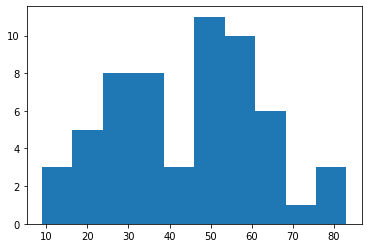

In [79]:
y = y[29:]
X = X[29:]
plt.hist(y)
plt.show()


In [80]:
test1 = SelectKBest(score_func=f_regression, k=100)
fit = test1.fit(X, y)
X = fit.transform(X)

In [81]:
runs = 5
important_features = [[] for i in range(runs)]

selector = RandomForestRegressor(n_estimators=30, criterion="absolute_error", random_state=42)
for i in range(runs):
    model = selector.fit(X, y)
    importances = model.feature_importances_

    for j in range(len(importances)):
        important_features[i].append(list(importances).index(importances[j])) if importances[j] > 0 else 0
for i in range(len(important_features) - 1):
    if i != 0:
         importances = set.intersection(*map(set, important_features))

In [82]:
importances = list(importances)
top_importances = importances[0:10]
top_X = X[..., top_importances]
X = X[..., importances]

In [83]:
feature = 8
ox = y
oy = X[:, feature]

C:\Users\Eugen\AppData\Local\Temp/ipykernel_16136/443961214.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\Eugen\AppData\Local\Temp/ipykernel_16136/443961214.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


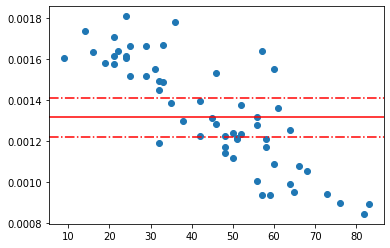

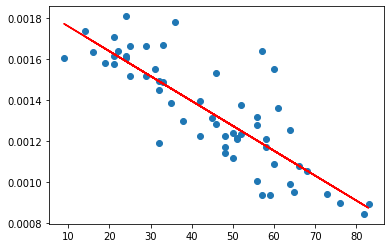

In [84]:
fig1 = plt.figure()
ax = plt.axes()

ax.scatter(ox, oy)
median = np.median(oy)
ax.axhline(median, c="r")
ax.axhline((median - (0.1 * (max(oy - min(oy))))), c="r", linestyle="-.")
ax.axhline((median + (0.1 * (max(oy - min(oy))))), c="r", linestyle="-.")
fig1.show()

fig2 = plt.figure()
ax = plt.axes()
ax.plot(ox, oy, 'o')
m, b = np.polyfit(ox, oy, 1)
ax.plot(ox, m * ox + b, c="r")
fig2.show()

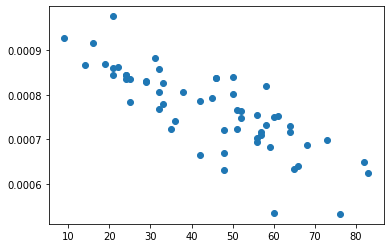

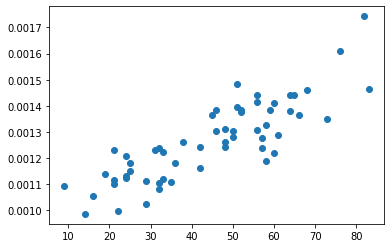

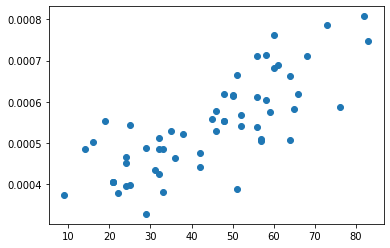

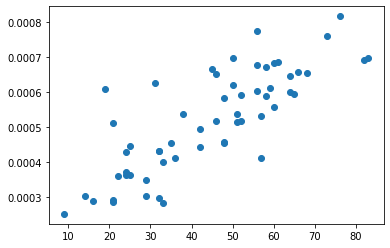

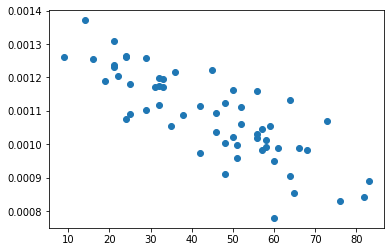

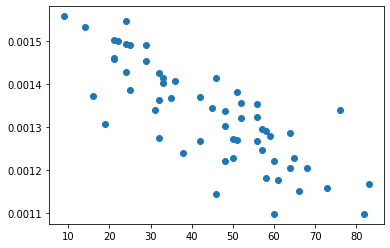

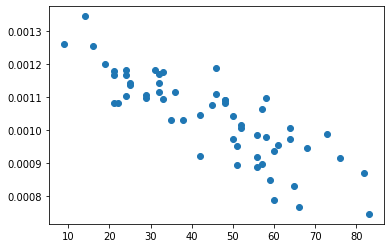

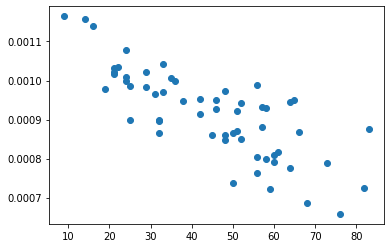

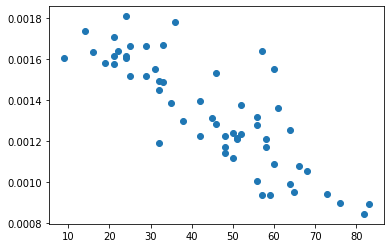

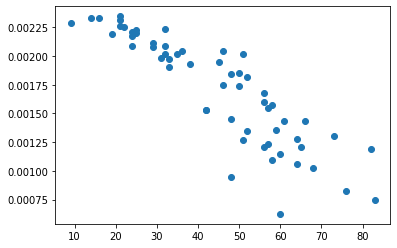

In [85]:
for i in range(10):
    oy = X[:, i]
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(ox,oy)
    fig.show

In [86]:
#names = names[importances]
#names = names.drop_duplicates()
#print(names)
#names.to_excel("../BIO_Ml/GSE52588/gene_names_CpG_based.xlsx")

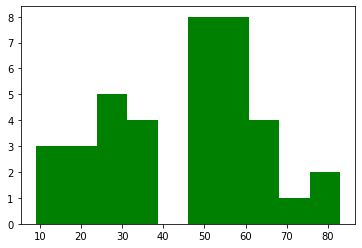

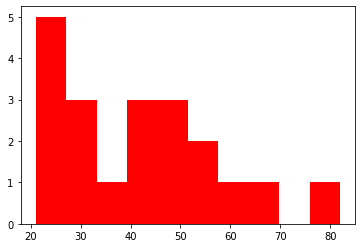

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.hist(y_train, color='g')
plt.show()
plt.hist(y_test, color="r")
plt.show()

In [88]:
regressor = RandomForestRegressor(n_estimators=42, criterion="absolute_error", random_state=42)
#regressor = LinearRegression()
#regressor = SVR(kernel="poly", C = 1.5)
model = regressor.fit(X_train, y_train)

In [89]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred,
                    "AE": y_test - y_pred,
                    "SE": (y_test - y_pred) ** 2})
print("MAE: ", mean_absolute_error(y_test, y_pred), "MSE: ", mean_squared_error(y_test, y_pred))
print(res)

MAE:  3.536904761904762 MSE:  19.957227891156457
    Actual  Predicted        AE         SE
0       21  30.238095 -9.238095  85.342404
1       24  27.809524 -3.809524  14.512472
2       56  59.809524 -3.809524  14.512472
3       36  34.190476  1.809524   3.274376
4       46  43.261905  2.738095   7.497166
5       61  61.119048 -0.119048   0.014172
6       64  58.000000  6.000000  36.000000
7       33  30.333333  2.666667   7.111111
8       45  38.571429  6.428571  41.326531
9       32  32.857143 -0.857143   0.734694
10      82  72.476190  9.523810  90.702948
11      21  21.928571 -0.928571   0.862245
12      51  56.404762 -5.404762  29.211451
13      42  45.952381 -3.952381  15.621315
14      33  30.904762  2.095238   4.390023
15      24  24.000000  0.000000   0.000000
16      25  28.595238 -3.595238  12.925737
17      42  36.523810  5.476190  29.988662
18      56  56.023810 -0.023810   0.000567
19      48  50.261905 -2.261905   5.116213


C:\Users\Eugen\AppData\Local\Temp/ipykernel_16136/4289472708.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_pred, "bo-", c="r")
C:\Users\Eugen\AppData\Local\Temp/ipykernel_16136/4289472708.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test, "bo-", c="g")


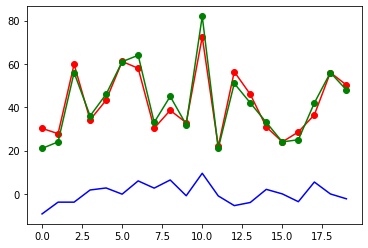

In [90]:
plt.plot(y_pred, "bo-", c="r")
plt.plot(y_test, "bo-", c="g")
plt.plot(y_test - y_pred, c="b")
plt.show()

In [91]:
# Посмотреть аномалии
# Нарисовать топ-n CpG
# Из VAC вытащить фичи
# Пересечь с лесом
# Проекция CpG на плоскость
# Стрим (проекция на сложное пространство)
# SHAP
